<h1 style="font-size:2em; text-align: center;">Cleaning the Data</h1>

In [2]:
import pandas as pd
#import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
# This gets data for county off of gender, ethnicity and removing nation and state levels

master_df = pd.read_csv("Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv", sep=",")

#removes the insufficient data columns
rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

#gets only male/female
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] != 'Overall']

#removes the overall for the ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] != 'Overall']

#only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']

#get the columns we are only using
desired_columns = ['LocationAbbr', 'LocationDesc', 'Data_Value', 'Stratification1', 'Stratification2']
cleaned_county_df = only_county_overall_df[desired_columns]

#Renamed the columns to better naming for the project
cleaned_county_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']

#Validated the column total (I checked against the excel and made sure this was correct)
#print(len(cleaned_county_df))

#Checking the data
cleaned_county_df.head()


,State,County,Heart Disease per 100k,Gender,Ethnicity
102,AK,Anchorage,317.5,Male,White
105,AK,Denali,400.7,Male,White
106,AK,Fairbanks North Star,401.0,Male,White
107,AK,Haines,385.5,Male,White
108,AK,Juneau,281.6,Male,White


In [4]:
#This block is to get the clean county overall data only 

rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

#gets overall for gender
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] == 'Overall']

#gets overall for ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] == 'Overall']

#only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']

#get the columns we are only using
cleaned_county_overall_df = only_county_overall_df[desired_columns]

#Renamed the columns to better naming for the project
cleaned_county_overall_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']


#Validated the column total (Verfied the excel and its correct) 
#print(len(cleaned_county_overall_df))

cleaned_county_overall_df.head()

,State,County,Heart Disease per 100k,Gender,Ethnicity
0,AK,Aleutians East,105.3,Overall,Overall
1,AK,Aleutians West,211.9,Overall,Overall
2,AK,Anchorage,257.9,Overall,Overall
3,AK,Bethel,351.6,Overall,Overall
5,AK,Denali,305.5,Overall,Overall


In [14]:
#This finds the outliers
def find_outliers_iqr(df, column):
    data = df[column]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = (data < lower_bound) | (data > upper_bound)

    df = df[~outliers]

    return df

#cleaned_county_df

cleaned_county_df = find_outliers_iqr(cleaned_county_df, 'Heart Disease per 100k')
print("5 Number Summary for cleaned data with no outliers\n", cleaned_county_df.describe())
cleaned_county_overall_df = find_outliers_iqr(cleaned_county_overall_df, 'Heart Disease per 100k')
print("\n5 Number Summary for cleaned data overall with no outliers\n", cleaned_county_overall_df.describe())


5 Number Summary for cleaned data with no outliers
        Heart Disease per 100k
count            13467.000000
mean               346.482966
std                143.335208
min                  6.000000
25%                239.450000
50%                335.700000
75%                445.350000
max                754.200000

5 Number Summary for cleaned data overall with no outliers
        Heart Disease per 100k
count             3148.000000
mean               352.295839
std                 78.385703
min                133.500000
25%                293.900000
50%                345.500000
75%                403.725000
max                565.200000


<h1 style="font-size:2em; text-align: center;">Exploratory Data Analysis</h1>

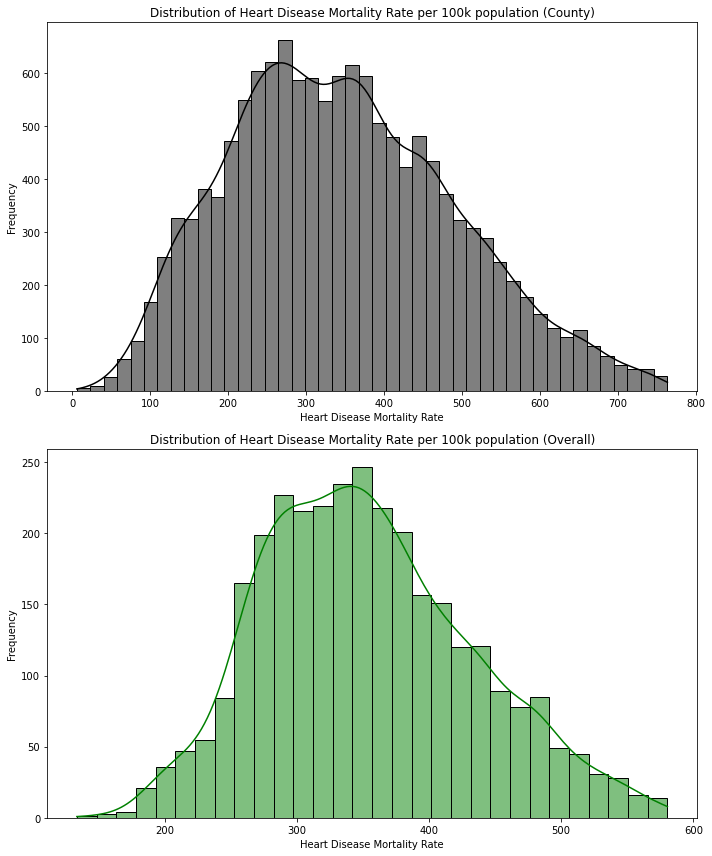

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with a 2x1 layout
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Subplot 1: Histogram for cleaned_county_df
sns.histplot(cleaned_county_df['Heart Disease per 100k'], bins='auto', kde=True, color='black', ax=axes[0])
axes[0].set_title('Distribution of Heart Disease Mortality Rate per 100k population (County)')
axes[0].set_xlabel('Heart Disease Mortality Rate')
axes[0].set_ylabel('Frequency')

# Subplot 2: Histogram for cleaned_county_overall_df
sns.histplot(cleaned_county_overall_df['Heart Disease per 100k'], bins='auto', kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Heart Disease Mortality Rate per 100k population (Overall)')
axes[1].set_xlabel('Heart Disease Mortality Rate')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

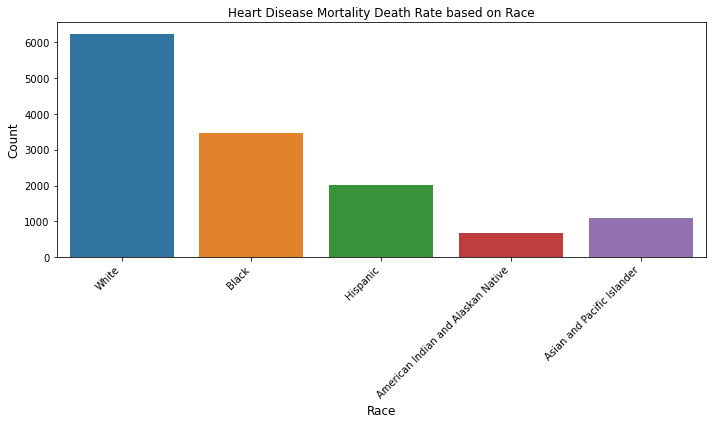

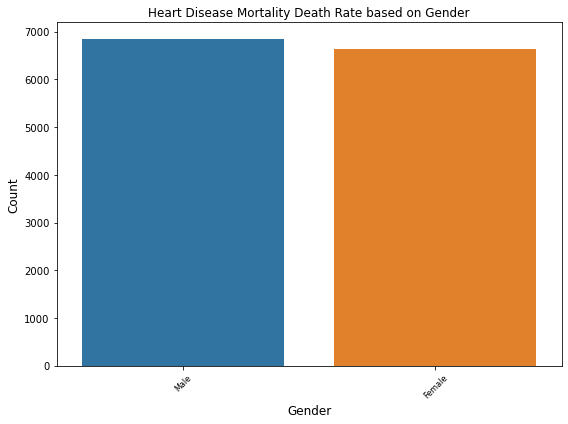

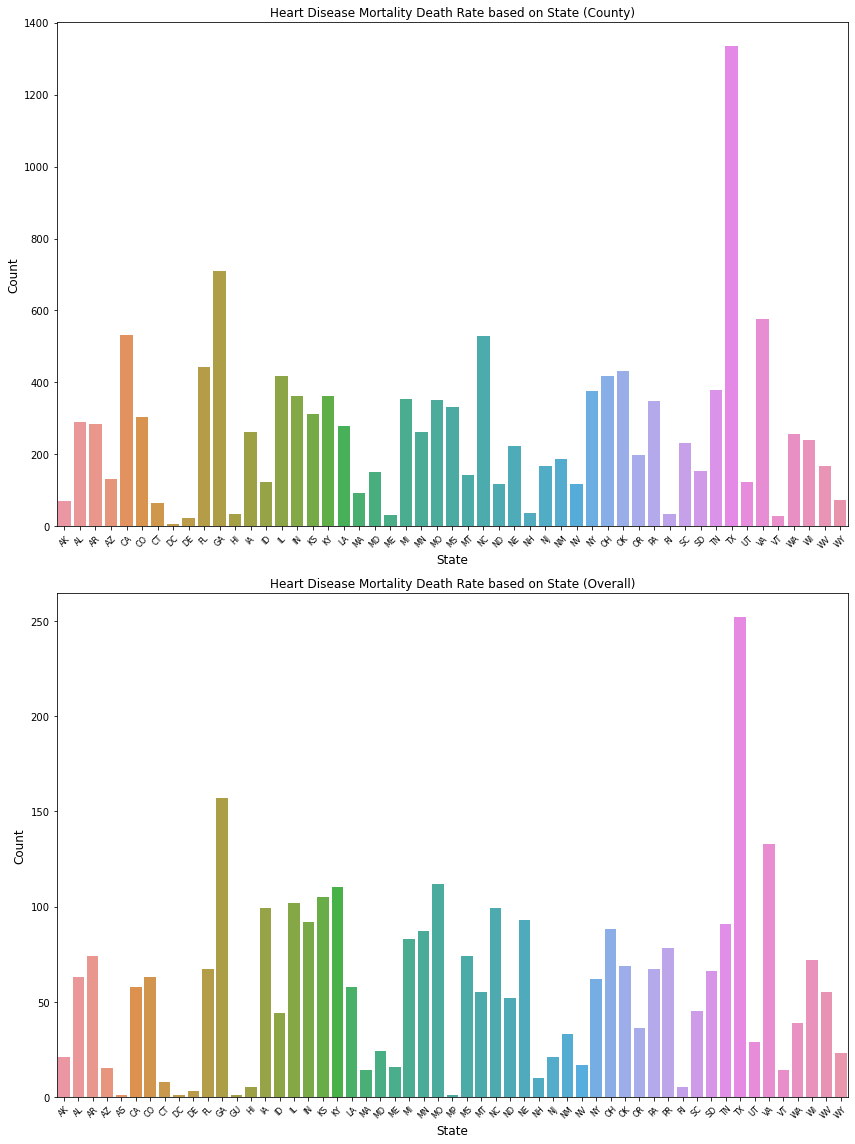

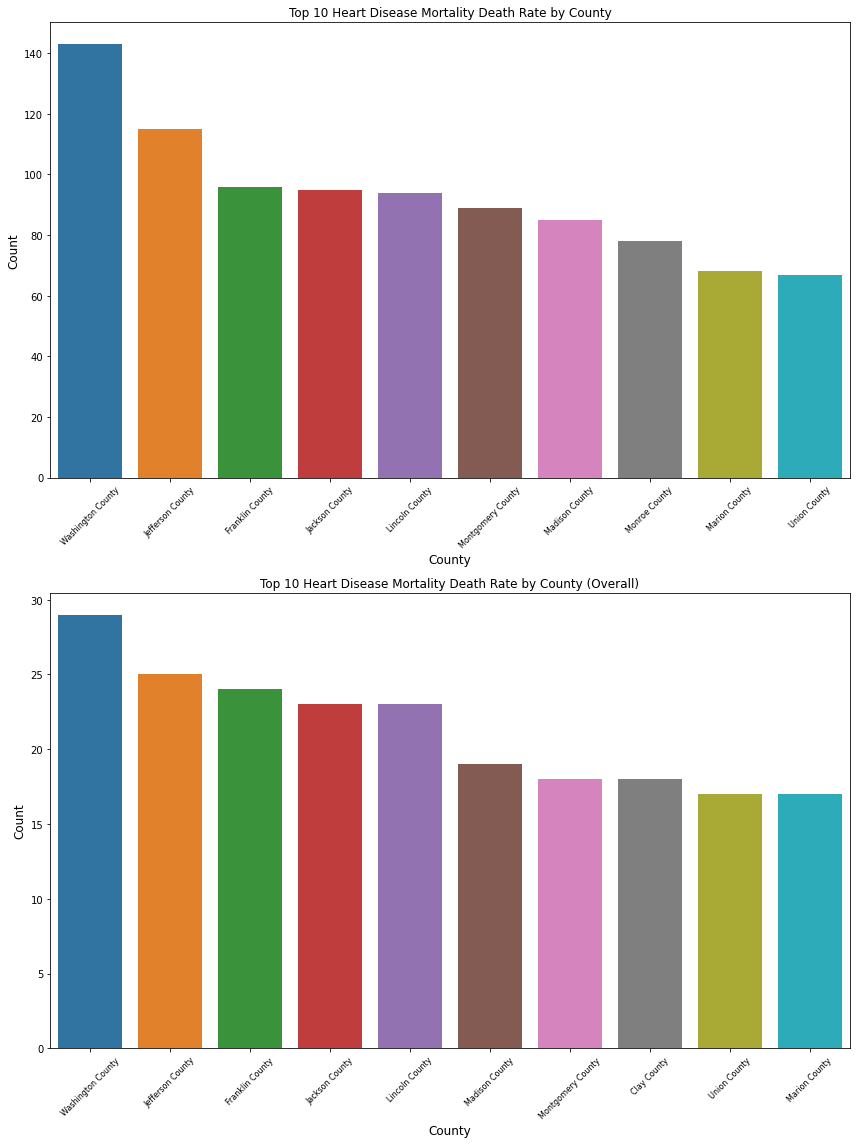

In [ ]:
#Below is for Ethnicity
plt.figure(figsize=(10, 6))  # Countplot for Ethnicity
sns.countplot(data=cleaned_county_df, x='Ethnicity')
plt.title('Heart Disease Mortality Death Rate based on Race', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels by 45 degrees and align them to the right
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping

# Below is for Gender

plt.figure(figsize=(8, 6))  # Countplot for Gender
sns.countplot(data=cleaned_county_df, x='Gender')
plt.title('Heart Disease Mortality Death Rate based on Gender', fontsize=12)
plt.xticks(rotation=45, fontsize=8)  # Decrease font size
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


#Below is for States

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with a 2x1 layout
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Subplot 1: Countplot for State in cleaned_county_df
sns.countplot(data=cleaned_county_df, x='State', ax=axs[0])
axs[0].set_title('Heart Disease Mortality Death Rate based on State (County)', fontsize=12)
axs[0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[0].set_xlabel('State', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)

# Subplot 2: Countplot for State in cleaned_county_overall_df
sns.countplot(data=cleaned_county_overall_df, x='State', ax=axs[1])
axs[1].set_title('Heart Disease Mortality Death Rate based on State (Overall)', fontsize=12)
axs[1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[1].set_xlabel('State', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()




#Below is the top 10 counties

# Calculate the top 10 counties based on heart disease mortality death rate
top_counties = cleaned_county_df['County'].value_counts().nlargest(10).index
top_counties_overall = cleaned_county_overall_df['County'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 counties
top_county_data = cleaned_county_df[cleaned_county_df['County'].isin(top_counties)]
top_county_data_overall = cleaned_county_overall_df[cleaned_county_overall_df['County'].isin(top_counties_overall)]

# Create a figure and axes with a 2x1 layout
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Subplot 1: Countplot for top 10 counties' heart disease mortality death rates
sns.countplot(data=top_county_data, x='County', order=top_counties, ax=axs[0])
axs[0].set_title('Top 10 Heart Disease Mortality Death Rate by County', fontsize=12)
axs[0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[0].set_xlabel('County', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)

# Subplot 2: Countplot for top 10 counties' heart disease mortality death rates (overall)
sns.countplot(data=top_county_data_overall, x='County', order=top_counties_overall, ax=axs[1])
axs[1].set_title('Top 10 Heart Disease Mortality Death Rate by County (Overall)', fontsize=12)
axs[1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[1].set_xlabel('County', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()




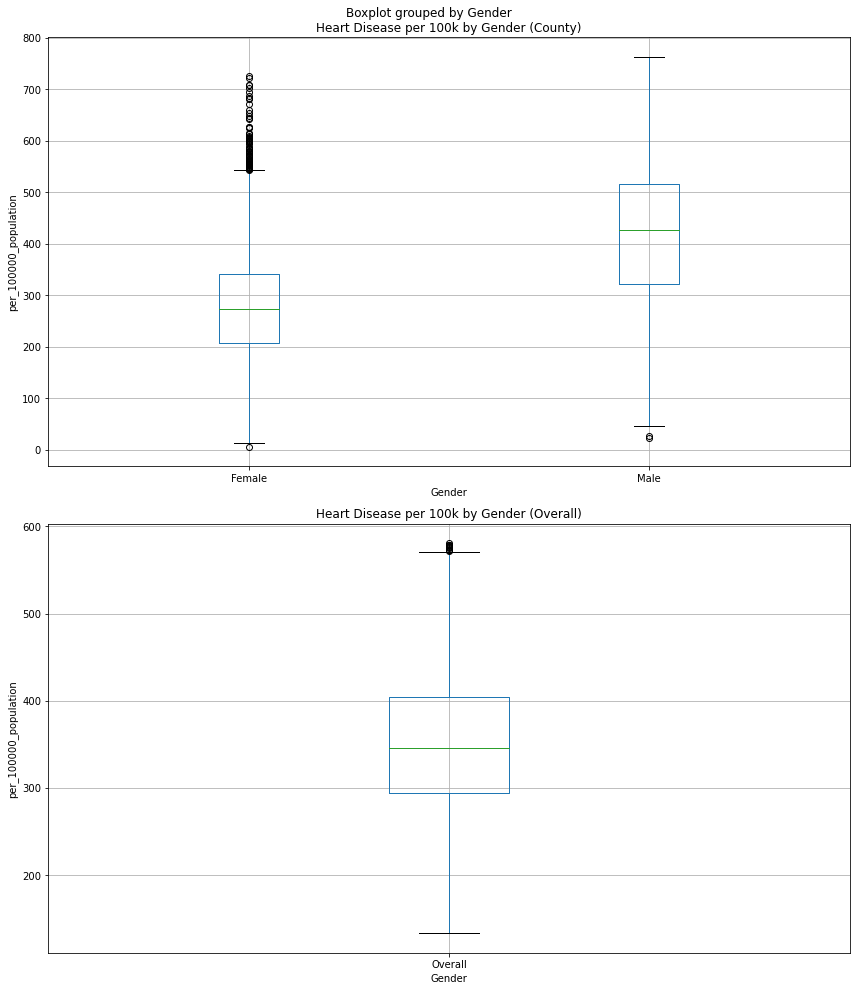

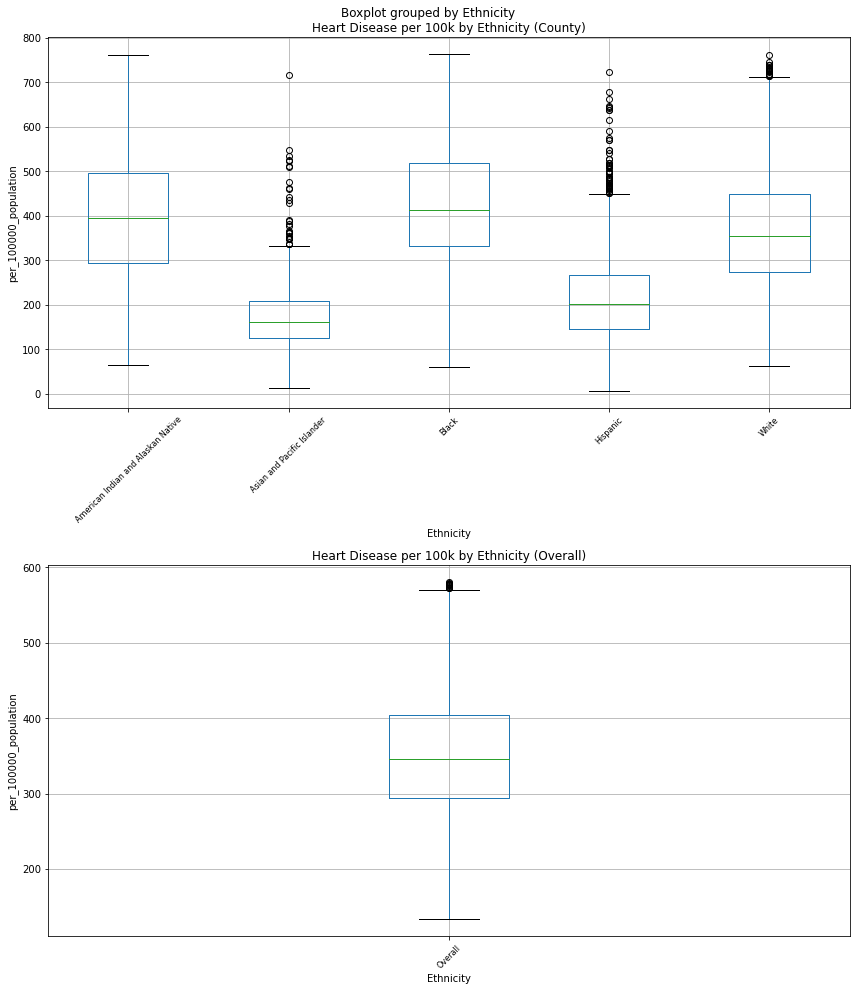

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for the first set of subplots
fig, axes1 = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

# Subplot 1: Box plot for Heart Disease per 100k by Gender in cleaned_county_df
cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Gender', ax=axes1[0])
axes1[0].set_title('Heart Disease per 100k by Gender (County)')
axes1[0].set_ylabel('per_100000_population')

# Subplot 2: Box plot for Heart Disease per 100k by Gender in cleaned_county_overall_df
cleaned_county_overall_df.boxplot(column='Heart Disease per 100k', by='Gender', ax=axes1[1])
axes1[1].set_title('Heart Disease per 100k by Gender (Overall)')
axes1[1].set_ylabel('per_100000_population')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Create a new figure and axes for the second set of subplots
fig, axes2 = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

# Subplot 1: Box plot for Heart Disease per 100k by Ethnicity in cleaned_county_df
cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Ethnicity', ax=axes2[0])
axes2[0].set_title('Heart Disease per 100k by Ethnicity (County)')
axes2[0].set_ylabel('per_100000_population')
axes2[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size

# Subplot 2: Box plot for Heart Disease per 100k by Ethnicity in cleaned_county_overall_df
cleaned_county_overall_df.boxplot(column='Heart Disease per 100k', by='Ethnicity', ax=axes2[1])
axes2[1].set_title('Heart Disease per 100k by Ethnicity (Overall)')
axes2[1].set_ylabel('per_100000_population')
axes2[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



In [ ]:
# Chi-square test for gender
contingency_gender = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Gender'])
chi2_stat_gender, p_val_gender, _, _ = chi2_contingency(contingency_gender)

# Chi-square test for race
contingency_race = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Ethnicity'])
chi2_stat_race, p_val_race, _, _ = chi2_contingency(contingency_race)

# Chi-square test for county
contingency_geo = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['County'])
chi2_stat_geo, p_val_geo, _, _ = chi2_contingency(contingency_geo)

contingency_state = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['State'])
chi2_stat_state, p_val_state, _, _ = chi2_contingency(contingency_state)


# Create a DataFrame for the chi-square statistics and p-values
data = {
    'Category': ['Gender', 'Ethnicity', 'County', 'State'],
    'Chi-square statistic': [chi2_stat_gender, chi2_stat_race, chi2_stat_geo, chi2_stat_state],
    'p-value': [p_val_gender, p_val_race, p_val_geo, p_val_state]
}

# Create the DataFrame for Chi-Square test
chi_square_df = pd.DataFrame(data)

# Print the DataFrame
print(chi_square_df)

    Category  Chi-square statistic        p-value
0     Gender          7.171499e+03   3.097805e-69
1  Ethnicity          2.560000e+04  2.355235e-111
2     County          9.512658e+06   1.000000e+00
3      State          2.557907e+05   9.999865e-01


In [ ]:
#This is a single sample z test
#State wise with having AK as the default it goes align with it not being significant
#With White being the default it goes in line with not being significant
#With male being the default it goes in line with not being significcant

from scipy import stats

# Calculate the overall mean heart disease rate
mean_heart_disease = cleaned_county_df['Heart Disease per 100k'].mean()

# Iterate through each state and perform the Z-test
for state in cleaned_county_df['State'].unique():
    heart_disease_state = cleaned_county_df[cleaned_county_df['State'] == state]['Heart Disease per 100k']
    
    # Performing the Z-test
    z_stat = (heart_disease_state.mean() - mean_heart_disease) / (heart_disease_state.std() / (len(heart_disease_state) ** 0.5))
    p_value = stats.norm.cdf(z_stat) * 2  # two-tailed test
    
    # Round Z-statistic and P-value to two decimals
    z_stat_rounded = round(z_stat, 2)
    p_value_rounded = round(p_value, 2)
    
    # Outputting the result
    print(f"Z-test for {state}:")
    print(f"Z-statistic: {z_stat_rounded}")
    print(f"P-value: {p_value_rounded}")
    if p_value < 0.05:
        print("The mean heart disease rate for this state is significantly different from the overall mean.")
    else:
        print("The mean heart disease rate for this state is not significantly different from the overall mean.")
    print()

# Z-test for Ethnicity
# Iterate through each ethnicity and perform the Z-test
for ethnicity in cleaned_county_df['Ethnicity'].unique():
    heart_disease_ethnicity = cleaned_county_df[cleaned_county_df['Ethnicity'] == ethnicity]['Heart Disease per 100k']
    
    # Performing the Z-test
    z_stat = (heart_disease_ethnicity.mean() - mean_heart_disease) / (heart_disease_ethnicity.std() / (len(heart_disease_ethnicity) ** 0.5))
    p_value = stats.norm.cdf(z_stat) * 2  # two-tailed test
    
    # Round Z-statistic and P-value to two decimals
    z_stat_rounded = round(z_stat, 2)
    p_value_rounded = round(p_value, 2)
    
    # Outputting the result
    print(f"Z-test for {ethnicity}:")
    print(f"Z-statistic: {z_stat_rounded}")
    print(f"P-value: {p_value_rounded}")
    if p_value < 0.05:
        print("The mean heart disease rate for this ethnicity is significantly different from the overall mean.")
    else:
        print("The mean heart disease rate for this ethnicity is not significantly different from the overall mean.")
    print()

# Z-test for Gender
# Iterate through each gender and perform the Z-test
for gender in cleaned_county_df['Gender'].unique():
    heart_disease_gender = cleaned_county_df[cleaned_county_df['Gender'] == gender]['Heart Disease per 100k']
    
    # Performing the Z-test
    z_stat = (heart_disease_gender.mean() - mean_heart_disease) / (heart_disease_gender.std() / (len(heart_disease_gender) ** 0.5))
    p_value = stats.norm.cdf(z_stat) * 2  # two-tailed test
    
    # Round Z-statistic and P-value to two decimals
    z_stat_rounded = round(z_stat, 2)
    p_value_rounded = round(p_value, 2)
    
    # Outputting the result
    print(f"Z-test for {gender}:")
    print(f"Z-statistic: {z_stat_rounded}")
    print(f"P-value: {p_value_rounded}")
    if p_value < 0.05:
        print("The mean heart disease rate for this gender is significantly different from the overall mean.")
    else:
        print("The mean heart disease rate for this gender is not significantly different from the overall mean.")
    print()

Z-test for AK:
Z-statistic: -1.62
P-value: 0.11
The mean heart disease rate for this state is not significantly different from the overall mean.

Z-test for AL:
Z-statistic: 11.87
P-value: 2.0
The mean heart disease rate for this state is not significantly different from the overall mean.

Z-test for AR:
Z-statistic: 12.6
P-value: 2.0
The mean heart disease rate for this state is not significantly different from the overall mean.

Z-test for AZ:
Z-statistic: -7.56
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-test for CA:
Z-statistic: -9.3
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-test for CO:
Z-statistic: -19.56
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-test for CT:
Z-statistic: -7.8
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-

<h1>Model Selection and Analysis</h1>

<h2>Linear Regression and Clustering</h2>

In [ ]:
import statsmodels.api as sm




gender_regression_df = cleaned_county_df.copy()

print(cleaned_county_df['Gender'])



# Convert 'Gender' to dummy variables
# Now 'Gender' will be encoded as 1 for Male and 0 for Female
gender_regression_df['Gender'] = pd.get_dummies(gender_regression_df['Gender'], drop_first=True)

print(gender_regression_df['Gender'])

x_gender = gender_regression_df['Gender']
y_heart = gender_regression_df['Heart Disease per 100k']

x_gender = sm.add_constant(x_gender)

gender_regression_model = sm.OLS(y_heart, x_gender).fit()

print(gender_regression_model.summary())

"""
R-Squared shows 23.6% of variability of the heart disease is explained by gender
F statistic 4167 the model is significiantly better fit than a model with no predictors 
prob of F statistics is close to 0 which proves that gender is related to heart disease
Log-likelohood is for model comparison. Higher is better
AIC, BIC are for other model comparisons. the lower is better

males = 1
females 0 
Const coef: this is to show when all values are 0 (Gender = 0 = female) which shows female average is 275.9 units
Gender Coef: males have a higher disease mortality rate by 139.94 unites
t stat: shows gender is statistically significant
P>|t|: shows the pvalue are close to .00 so are significant
omnibus: this is small so it si normally distributed
prob(omnibus): higher values so it shows it nromal 
Durbin-Watson: Since it is not close to two this show significant autocorrelation
Cond. No. : This measure multicollinearity. Values greater than 30 indicate multicollinearity

MODEL AND DATA IS SIGNIFICANT

"""


102        Male
105        Male
106        Male
107        Male
108        Male
          ...  
59035      Male
59038      Male
59055    Female
59059    Female
59067    Female
Name: Gender, Length: 13484, dtype: object
102      1
105      1
106      1
107      1
108      1
        ..
59035    1
59038    1
59055    0
59059    0
59067    0
Name: Gender, Length: 13484, dtype: uint8
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.236
Model:                                OLS   Adj. R-squared:                  0.236
Method:                     Least Squares   F-statistic:                     4167.
Date:                    Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                            19:18:31   Log-Likelihood:                -84329.
No. Observations:                   13484   AIC:                         1.687e+05
Df Residuals:                       1

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared shows 23.6% of variability of the heart disease is explained by gender\nF statistic 4167 the model is significiantly better fit than a model with no predictors \nprob of F statistics is close to 0 which proves that gender is related to heart disease\nLog-likelohood is for model comparison. Higher is better\nAIC, BIC are for other model comparisons. the lower is better\n\nmales = 1\nfemales 0 \nConst coef: this is to show when all values are 0 (Gender = 0 = female) which shows female average is 275.9 units\nGender Coef: males have a higher disease mortality rate by 139.94 unites\nt stat: shows gender is statistically significant\nP>|t|: shows the pvalue are close to .00 so are significant\nomnibus: this is small so it si normally distributed\nprob(omnibus): higher values so it shows it nromal \nDurbin-Watson: Since it is not close to two this show significant autocorrelation\nCond. No. : This measure multicollinearity. Values greater than 30 indicate multicollinearity\n\nMO

In [ ]:
#This data includes whites and is here to show it is not correct will delete after the technical report 

# Create the dummy data to where the data is hot encoded
ethnicity_regression_df = cleaned_county_df.copy()
ethnicity_dummies = pd.get_dummies(ethnicity_regression_df['Ethnicity'])
ethnicity_regression_dummies = pd.concat([ethnicity_regression_df, ethnicity_dummies], axis = 1)

# Includes White
x_ethnicity = ethnicity_regression_dummies[['White', 'Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander']]
y_heart = ethnicity_regression_dummies['Heart Disease per 100k']

# add the constant and have it fit Linear regression model
x_ethnicity = sm.add_constant(x_ethnicity)
ethnicity_regression_model = sm.OLS(y_heart, x_ethnicity).fit()
print(ethnicity_regression_model.summary())

"""
R-Squared: 28% of the data is explained by ethnicity
F statistic: 1329 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood: is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when no one has ethnicity (the default is assumed white)
rest of Coef: average heart disease for each gender
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: no significance since close to 1


MODEL is significant but the data is not

"""

                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.340
Model:                                OLS   Adj. R-squared:                  0.340
Method:                     Least Squares   F-statistic:                     1737.
Date:                    Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                            19:18:31   Log-Likelihood:                -83342.
No. Observations:                   13484   AIC:                         1.667e+05
Df Residuals:                       13479   BIC:                         1.667e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared: 28% of the data is explained by ethnicity\nF statistic: 1329 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood: is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when no one has ethnicity (the default is assumed white)\nrest of Coef: average heart disease for each gender\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: no significance since close to 1\n\n\nMODEL is significant but the data is not\n\n'

In [ ]:
#removing multi colinearity from the ethnicity
#had to remove it by dropping white. It is assumed that if any other ethnicity has 0  (false) that means they are white
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Make the dummy data
ethnicity_regression_dummies_noCol = ethnicity_regression_dummies.copy()
ethnicity_regression_dummies_noCol = ethnicity_regression_dummies_noCol.drop(columns=['White'])

#Removes white to make it the default and remove collinearity 
x_no_white = ethnicity_regression_dummies_noCol[['Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander']]
y_heart = ethnicity_regression_dummies['Heart Disease per 100k']

# Variance Inflation Factor (VIF) Calculation:
# VIF is used to detect multicollinearity among predictor variables in regression analysis.
# High VIF values indicate high correlation between the predictor variables, which can lead to unstable
# and unreliable estimates in the regression model.
vif_data = x_no_white.copy()

# Add a constant for intercept term
vif_data = sm.add_constant(vif_data)
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns

# Calculate VIF for each predictor variable
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Identify variables with VIF greater than 10 (common threshold indicating multicollinearity)
high_vif_variables = vif[vif["VIF"] > 10]["Variable"].tolist()

# Drop high VIF variables from the predictor variables
x_no_white = x_no_white.drop(columns=high_vif_variables)
x_no_white = sm.add_constant(x_no_white)

# Fit Ordinary Least Squares (OLS) regression model using the updated predictor variables
# and the target variable y_heart
model = sm.OLS(y_heart, x_no_white).fit()

print("\nModel Summary After Addressing Multicollinearity:")
print(model.summary())

"""
R-Squared: 31% of the data is explained by ethnicity
F statistic: 1529 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood(neg does not matter): is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when no one has ethnicity (the default is assumed white)
black coef: higher than white
hispanic coef: lower than white
indian coef: higer than white
asian coef: worse than white
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: significance since close to .00

MODEL AND DATA IS SIGNIFICANT


"""




Model Summary After Addressing Multicollinearity:
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.340
Model:                                OLS   Adj. R-squared:                  0.340
Method:                     Least Squares   F-statistic:                     1737.
Date:                    Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                            19:18:31   Log-Likelihood:                -83342.
No. Observations:                   13484   AIC:                         1.667e+05
Df Residuals:                       13479   BIC:                         1.667e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared: 31% of the data is explained by ethnicity\nF statistic: 1529 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood(neg does not matter): is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when no one has ethnicity (the default is assumed white)\nblack coef: higher than white\nhispanic coef: lower than white\nindian coef: higer than white\nasian coef: worse than white\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: significance since close to .00\n\nMODEL AND DATA IS SIGNIFICANT\n\n\n'

In [ ]:
#alaska (ak) is the default
# vif is addressing the inflation

state_regression_df = cleaned_county_df.copy()

# Creates the hot encoded data and drops the first state (AK)
state_regression_encode = pd.get_dummies(state_regression_df, columns=['State'], drop_first=True)

#Get only the states as the predictory variable
x_hot_encoded_state = state_regression_encode.drop(['Heart Disease per 100k', 'County', 'Gender', 'Ethnicity'], axis=1)  # Predictor variables
y_heart = state_regression_encode['Heart Disease per 100k']

vif_data_state = x_hot_encoded_state.copy()
vif_data_state = sm.add_constant(vif_data_state)
vif_state = pd.DataFrame()
vif_state["Variable"] = vif_data_state.columns
vif_state["VIF"] = [variance_inflation_factor(vif_data_state.values, i) for i in range(vif_data_state.shape[1])]



high_vif_variables = vif_state[vif_state["VIF"] > 10]["Variable"].tolist()
high_vif_variables.remove('const')



x_hot_encoded_state = sm.add_constant(x_hot_encoded_state)
model = sm.OLS(y_heart, x_hot_encoded_state).fit()

print("\nModel Summary After Addressing Multicollinearity:")
print(model.summary())

"""
R-Squared: 16% of the data is explained by ethnicity
F statistic: 54 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood(neg does not matter): is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when no one has state (the default is assumed alaska)
black coef: higher than white
hispanic coef: lower than white
indian coef: higer than white
asian coef: worse than white
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: Depends on the state some of them are not significant. These would be the states to study

MODEL AND DATA IS SIGNIFICANT (depending on state)

based off the chi square test this shows that these results for signficant contribution to heart disease mortality 
can be due to random chance. The best is to look at the countries that do no if you want to deep dive more and 
go under the assumption this is not random chance.

Texas and georgia were kicked out cuz of VIF

"""





# print(state_encode.tail(50))

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



Model Summary After Addressing Multicollinearity:
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.166
Model:                                OLS   Adj. R-squared:                  0.163
Method:                     Least Squares   F-statistic:                     53.51
Date:                    Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                            19:18:32   Log-Likelihood:                -84920.
No. Observations:                   13484   AIC:                         1.699e+05
Df Residuals:                       13433   BIC:                         1.703e+05
Df Model:                              50                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

'\nR-Squared: 16% of the data is explained by ethnicity\nF statistic: 54 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood(neg does not matter): is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when no one has state (the default is assumed alaska)\nblack coef: higher than white\nhispanic coef: lower than white\nindian coef: higer than white\nasian coef: worse than white\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: Depends on the state some of them are not significant. These would be the states to study\n\nMODEL AND DATA IS SIGNIFICANT (depending on state)\n\nbased off the chi square test this shows that these results for signficant contribution to heart disease mortality \ncan be due to random chance. The best is to look at the countries that do no if you want to deep dive more and \ngo under the 

In [ ]:
default_white_race = x_no_white.drop(columns='const') #have already been vifed since took previously

# combine gender, and race
combined = pd.concat([gender_regression_df[['Gender', 'Heart Disease per 100k']], default_white_race], axis=1)


x_comb = combined.drop('Heart Disease per 100k', axis=1)
y_comb = combined['Heart Disease per 100k']

x_comb = sm.add_constant(x_comb)

model = sm.OLS(y_comb, x_comb).fit()


print(model.summary())

"""
R-Squared: 58% of the data is explained by ethnicity
F statistic: 3816 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood(neg does not matter): is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when someone is a white female (all other refs are 0)
Gender coef: being male increases 142 units
black coef: being black incerease by 60
hispanic coef: lowers by 155
indian coef: higher by 28
asian coef: being asian lowers by 196
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: significance since close to .00

MODEL AND DATA IS SIGNIFICANT



"""



                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.586
Model:                                OLS   Adj. R-squared:                  0.586
Method:                     Least Squares   F-statistic:                     3816.
Date:                    Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                            19:18:32   Log-Likelihood:                -80198.
No. Observations:                   13484   AIC:                         1.604e+05
Df Residuals:                       13478   BIC:                         1.605e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared: 58% of the data is explained by ethnicity\nF statistic: 3816 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood(neg does not matter): is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when someone is a white female (all other refs are 0)\nGender coef: being male increases 142 units\nblack coef: being black incerease by 60\nhispanic coef: lowers by 155\nindian coef: higher by 28\nasian coef: being asian lowers by 196\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: significance since close to .00\n\nMODEL AND DATA IS SIGNIFICANT\n\n\n\n'

Centroid Values for Each Cluster:


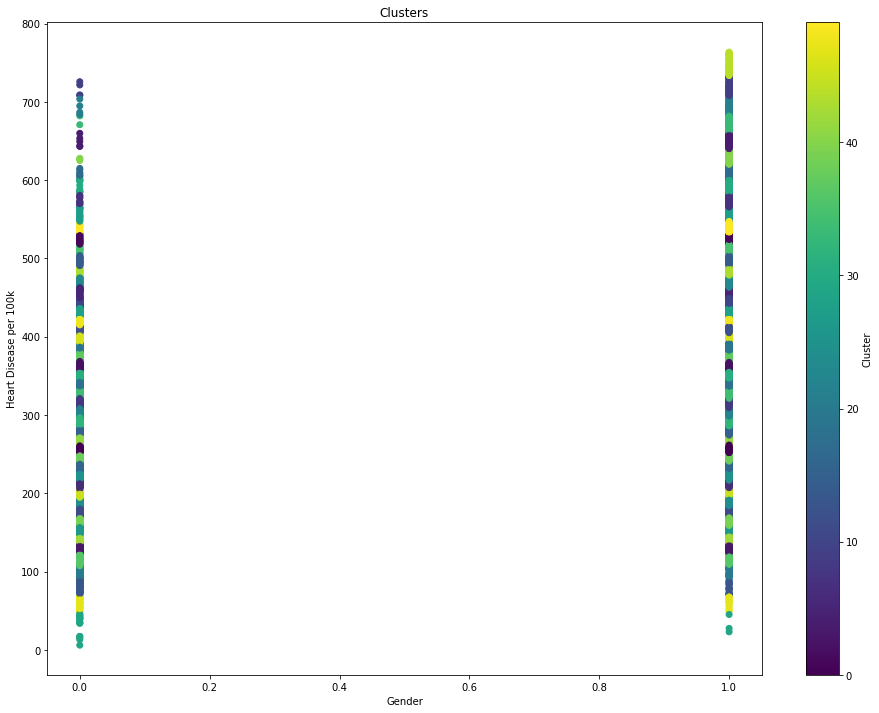

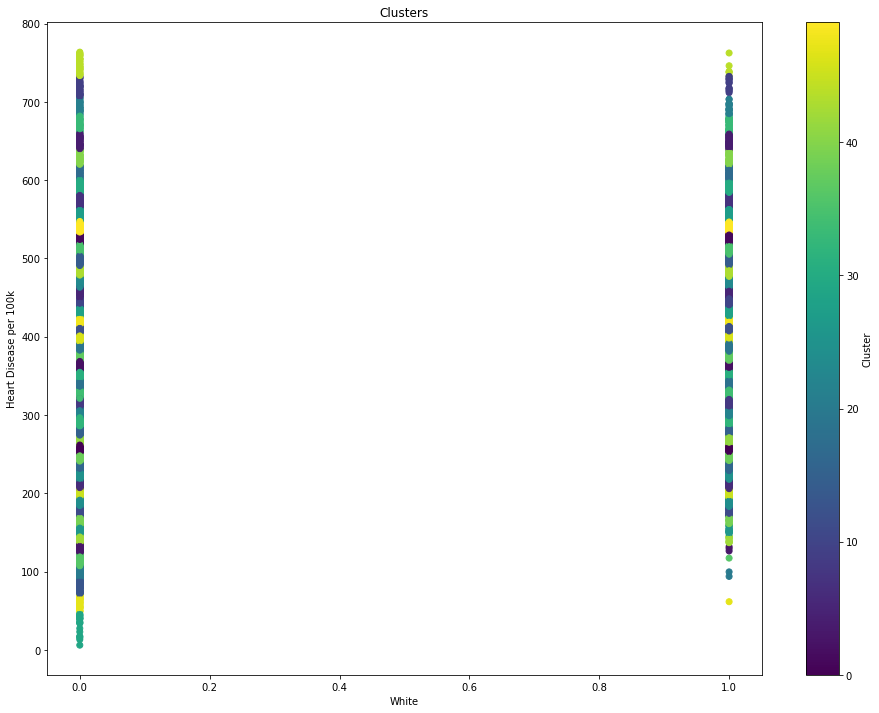

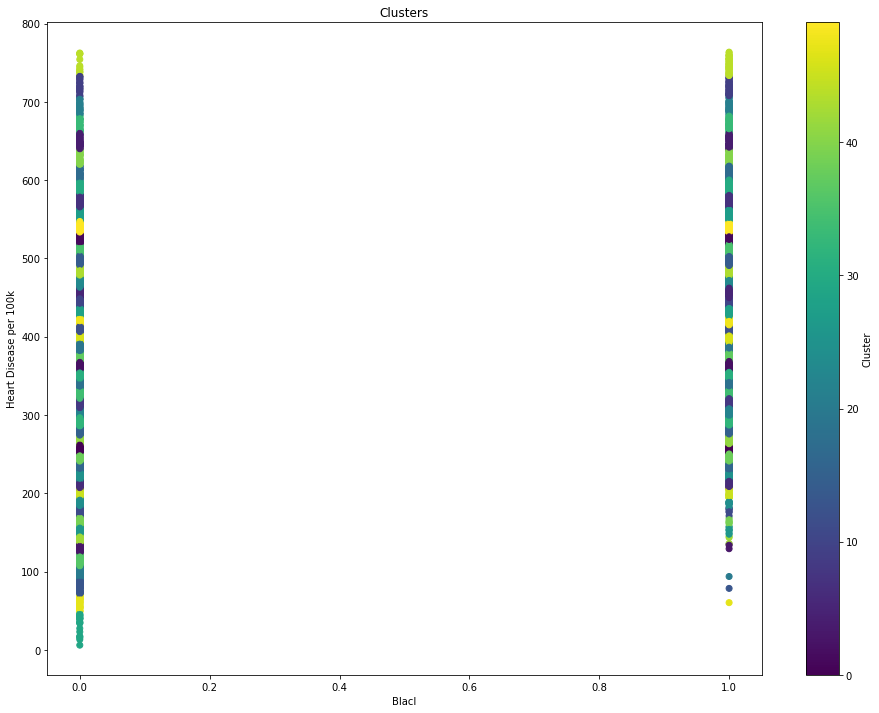

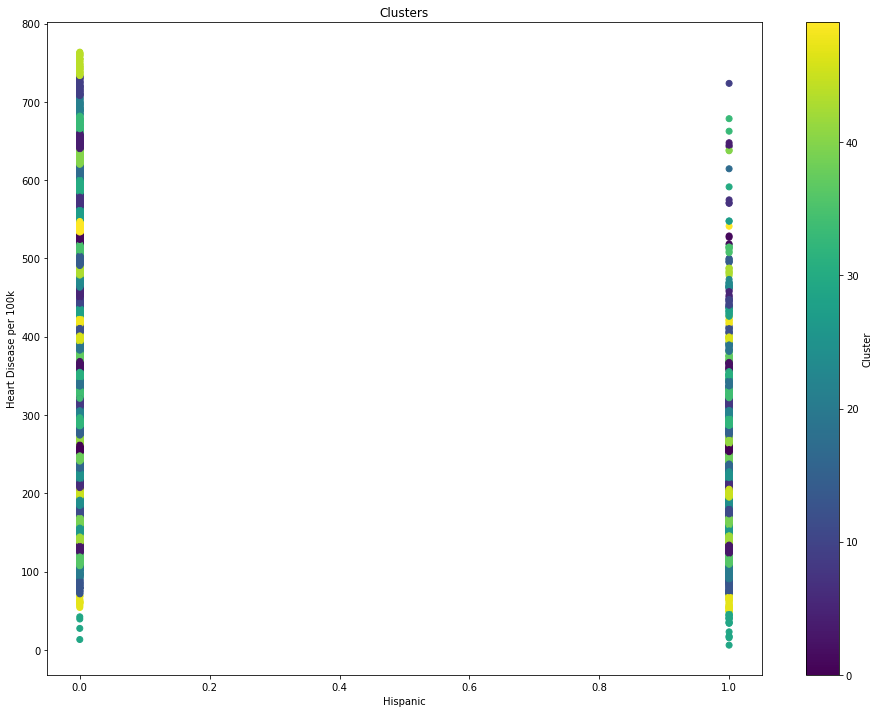

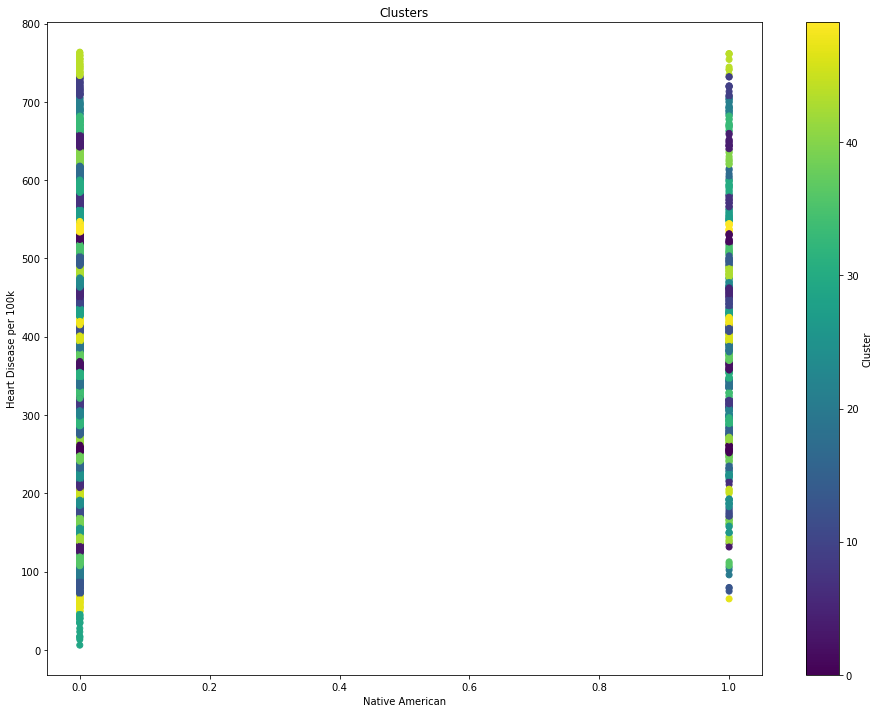

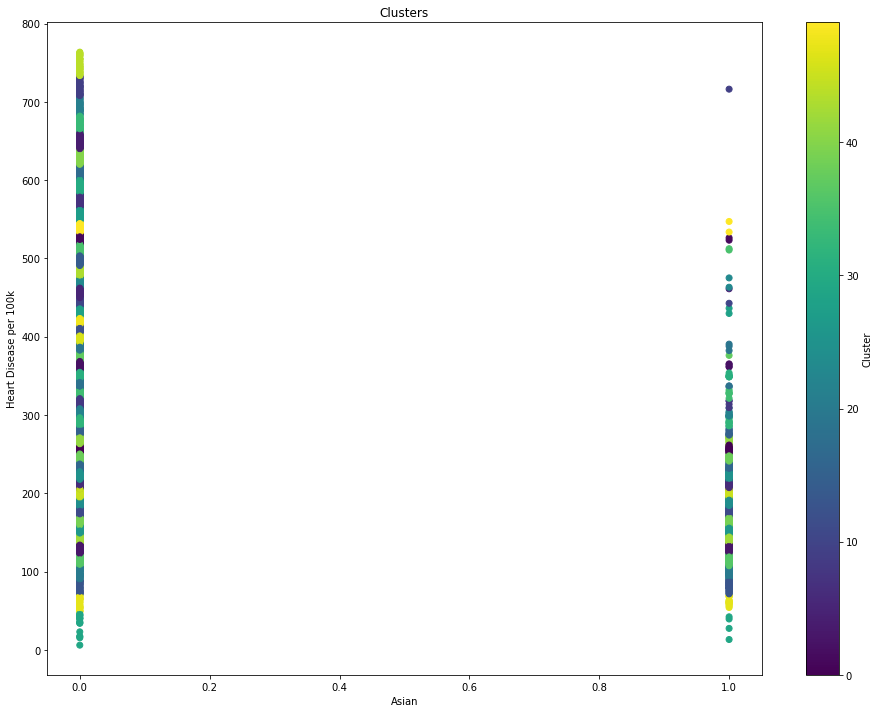

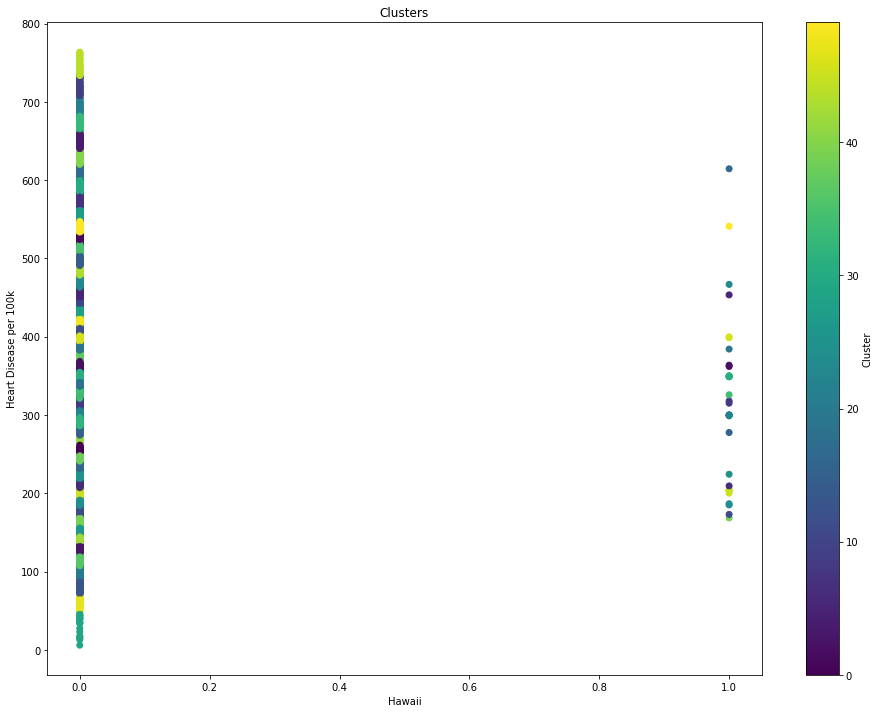

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


all_races = ethnicity_regression_dummies.copy()
all_races_only = all_races[['Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander', 'White']]


gender_bi = gender_regression_df.copy()
gender_bi = gender_bi[['Gender', 'Heart Disease per 100k']]



all_state = pd.get_dummies(state_regression_df, columns=['State']) 
all_state_only = all_state.drop(['Heart Disease per 100k', 'County', 'Gender', 'Ethnicity'], axis=1)



combined_cluster_no_state = combined.copy()
default_state = x_hot_encoded_state.drop(columns='const')
combined_cluster = pd.concat([all_races_only, gender_bi, all_state_only], axis=1)


scaler = StandardScaler()


# Choose the number of clusters
num_clusters = 50  

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(combined_cluster)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
combined_cluster['Cluster'] = cluster_labels

centroids = kmeans.cluster_centers_

# Create a DataFrame to display centroid values
centroid_df = pd.DataFrame(centroids, columns=combined_cluster.columns[:-1])  # Exclude the 'Cluster' column

print("Centroid Values for Each Cluster:")
#print(centroid_df)

plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Gender'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Gender')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['White'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('White')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Black'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Blacl')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Hispanic'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Hispanic')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['American Indian and Alaskan Native'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Native American')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Asian and Pacific Islander'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Asian')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['State_HI'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Hawaii')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

<h2>Linear Regression Visual Modeling </h2>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

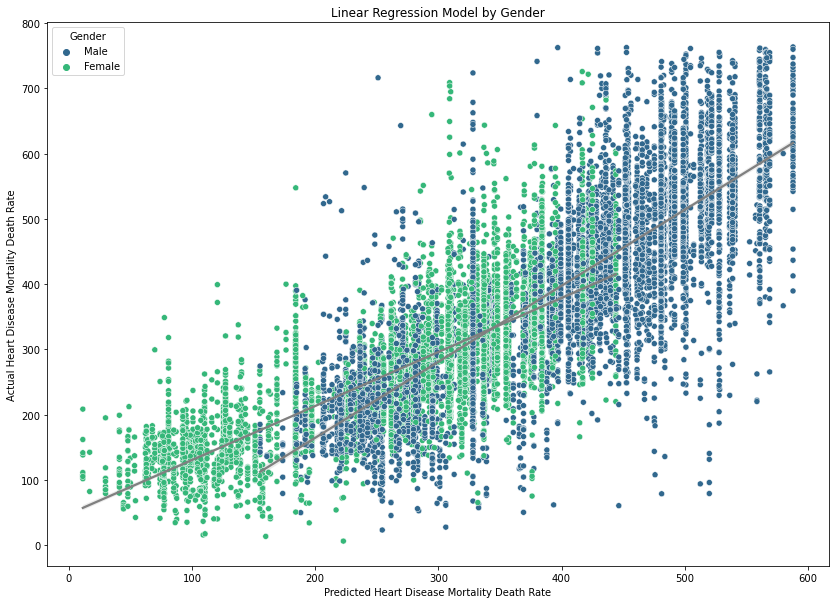

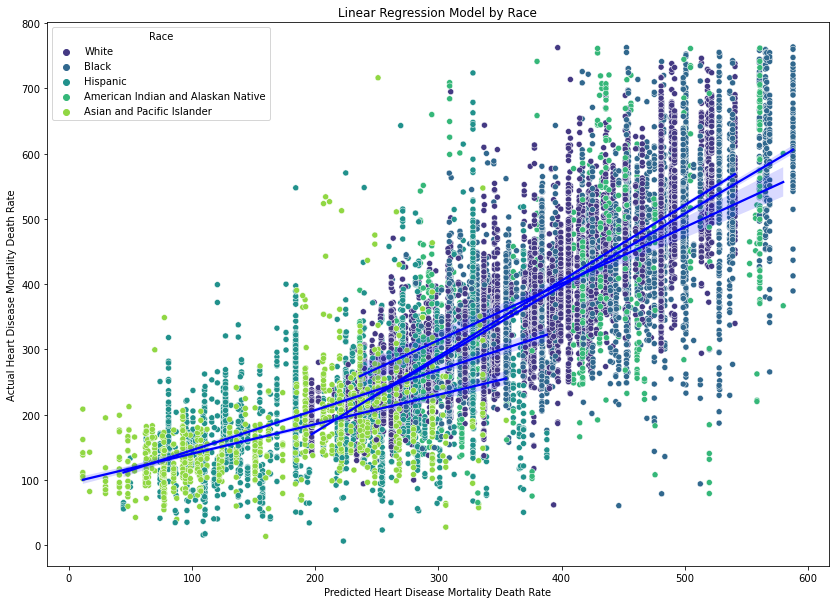

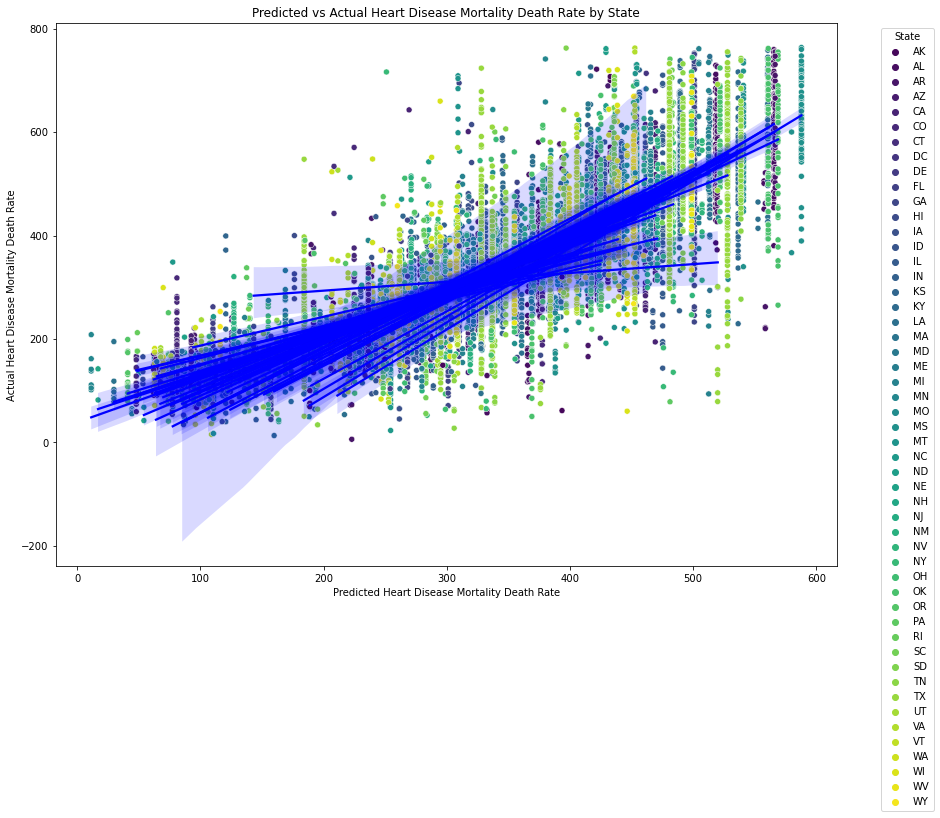

In [ ]:
# Selecting relevant columns
X = cleaned_county_df[['Gender', 'Ethnicity', 'State']]
y = cleaned_county_df['Heart Disease per 100k']

# Define preprocessing steps for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Ethnicity', 'State'])  # One-hot encode categorical variables
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Linear regression model
])

# Fit the pipeline on the data
pipeline.fit(X, y)

# Predict heart disease mortality death rate
y_pred = pipeline.predict(X)


plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='Gender', palette='viridis', legend='full')
for category in cleaned_county_df['Gender'].unique():
    category_mask = (cleaned_county_df['Gender'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='gray')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Gender')
plt.legend(title='Gender')
plt.show()



# Plot for Race
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='Ethnicity', palette='viridis', legend='full')
for category in cleaned_county_df['Ethnicity'].unique():
    category_mask = (cleaned_county_df['Ethnicity'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='blue')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Race')
plt.legend(title='Race')
plt.show()

#Plot for State
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='State', palette='viridis')
for category in cleaned_county_df['State'].unique():
    category_mask = (cleaned_county_df['State'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='blue')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Predicted vs Actual Heart Disease Mortality Death Rate by State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




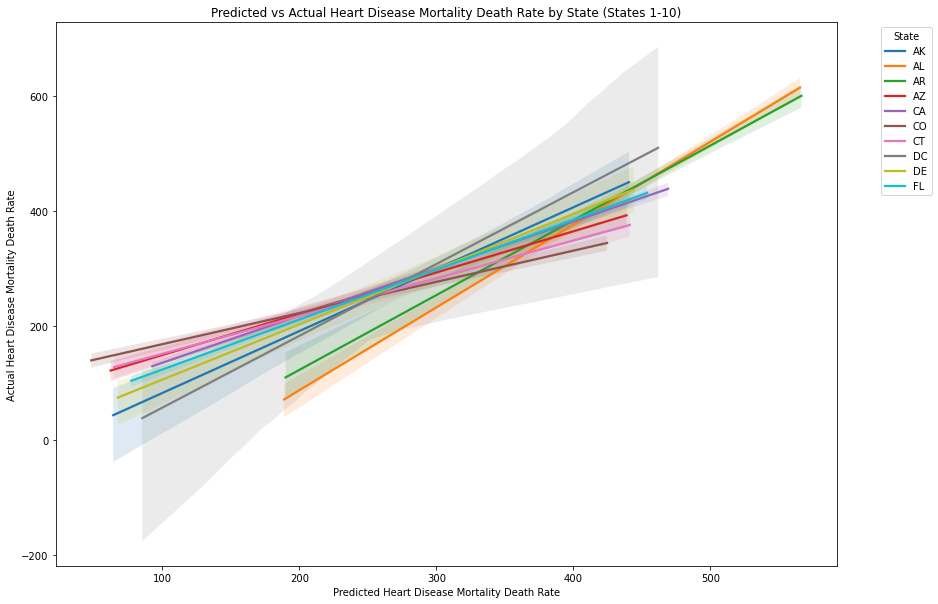

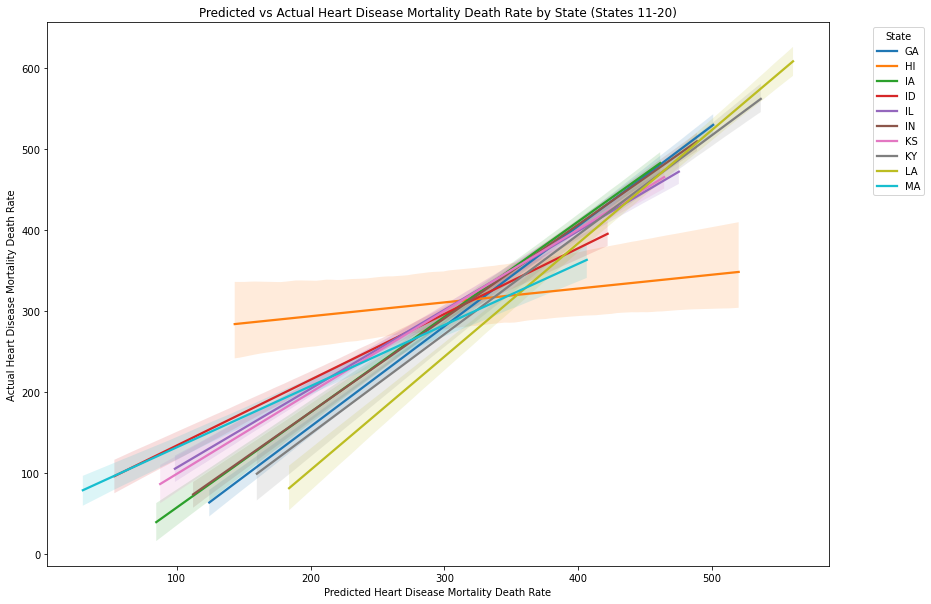

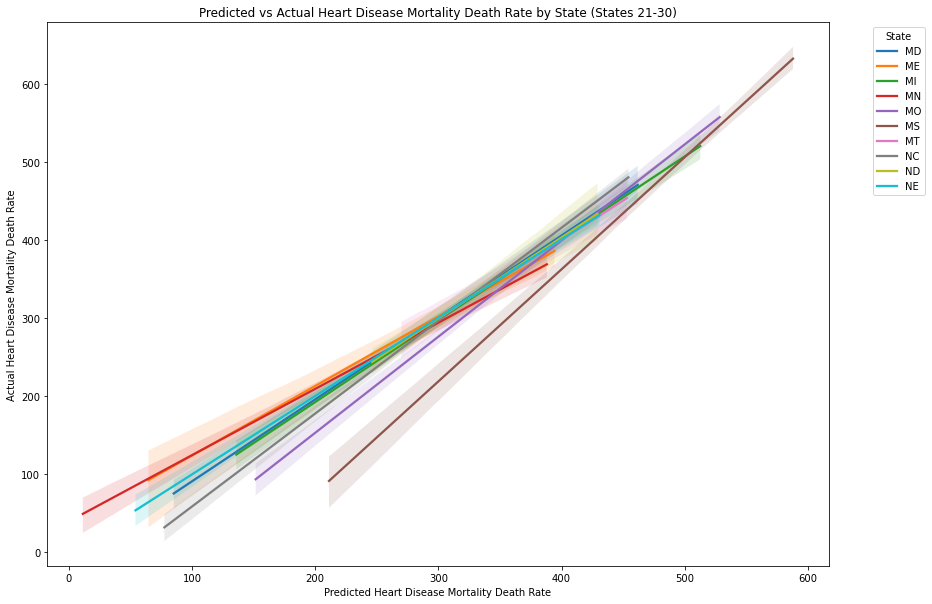

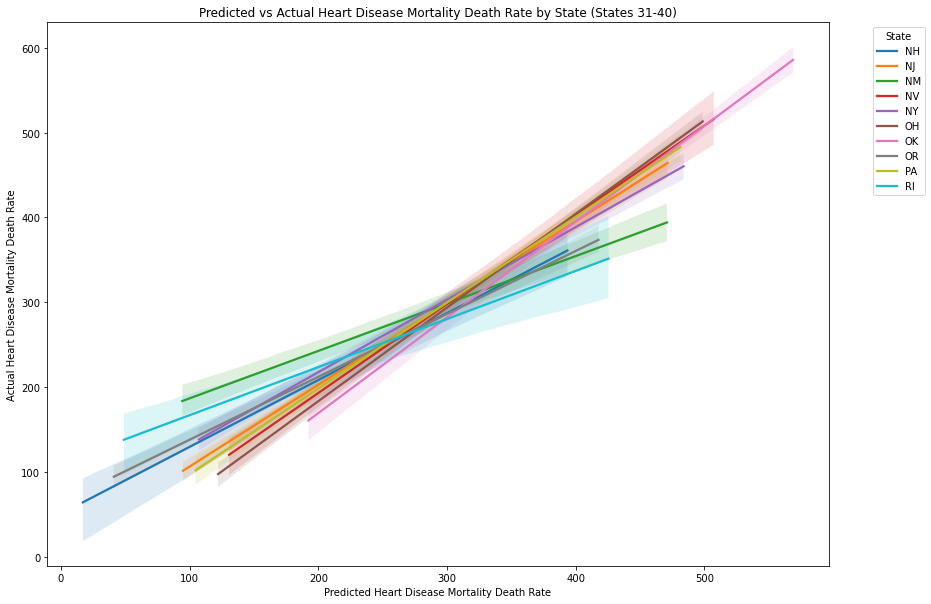

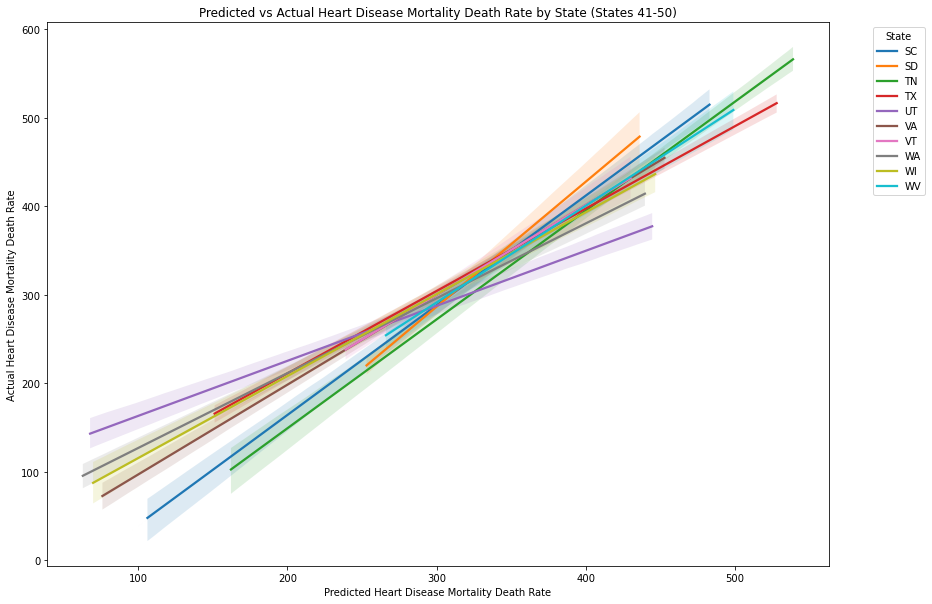

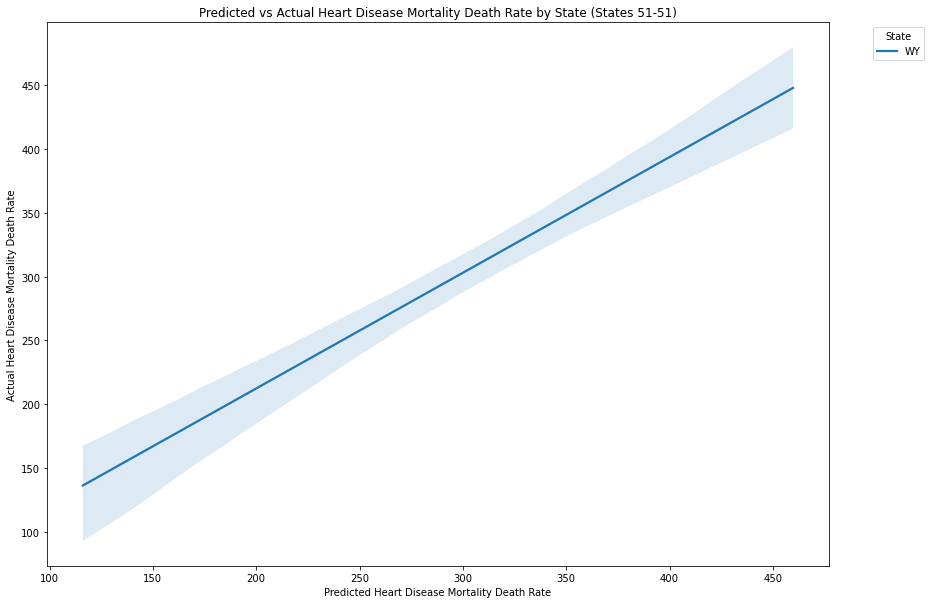

In [ ]:
import numpy as np

# Determine the number of groups (graphs) needed
num_states = len(cleaned_county_df['State'].unique())
num_groups = int(np.ceil(num_states / 10))  # Round up to the nearest integer

# Plot for each group of states
for i in range(num_groups):
    start_index = i * 10
    end_index = min((i + 1) * 10, num_states)  # Ensure not to exceed the number of states
    states_subset = list(cleaned_county_df['State'].unique())[start_index:end_index]
    
    plt.figure(figsize=(14, 10))
    for category in states_subset:
        category_mask = (cleaned_county_df['State'] == category)
        sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, label=category)
    
    plt.xlabel('Predicted Heart Disease Mortality Death Rate')
    plt.ylabel('Actual Heart Disease Mortality Death Rate')
    plt.title(f'Predicted vs Actual Heart Disease Mortality Death Rate by State (States {start_index+1}-{end_index})')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    #Assumption for Hawaii. It is the amount of data collected (seen in clustering) and assuming the poplulation is majority Asian
